In [1]:
%cd ../

/src


In [15]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score
import torch
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [3]:
from src.datasets.MNIST import MNIST

## Prepare MNIST dataset

In [5]:
x_train, y_train, x_test, y_test = MNIST(seed=0).data()

In [6]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
x_train = x_train.values.astype(np.float32)
x_test = x_test.values.astype(np.float32)

In [10]:
x_train.shape

(54077, 784)

In [8]:
from src.models.autoencoder import AutoEncoder

In [9]:
from torchsummary import summary
model = AutoEncoder(n_features=x_train.shape[1], hidden_size=10, gpu='0')
summary(model, x_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1           [-1, 54077, 512]         401,920
              Tanh-2           [-1, 54077, 512]               0
            Linear-3           [-1, 54077, 256]         131,328
              Tanh-4           [-1, 54077, 256]               0
            Linear-5           [-1, 54077, 128]          32,896
              Tanh-6           [-1, 54077, 128]               0
            Linear-7            [-1, 54077, 64]           8,256
              Tanh-8            [-1, 54077, 64]               0
            Linear-9            [-1, 54077, 32]           2,080
             Tanh-10            [-1, 54077, 32]               0
           Linear-11            [-1, 54077, 10]             330
          Encoder-12            [-1, 54077, 10]               0
           Linear-13            [-1, 54077, 32]             352
             Tanh-14            [-1, 54

In [29]:
from src.wrapper.regressor import AutoEncoderNet
from skorch import NeuralNetRegressor

In [53]:
net = AutoEncoderNet(
    AutoEncoder,
    module__n_features=x_train.shape[1],
    module__hidden_size=4, 
    module__gpu='0',
    lr=0.1,
    max_epochs=6
)

In [54]:
net.fit(x_train, x_train)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1032        0.0880  7.7901
      2        0.0750        0.0702  7.7169
      3        0.0690        0.0688  7.0944
      4        0.0684        0.0683  8.2676
      5        0.0682        0.0680  8.8743
      6        0.0680        0.0677  8.8459


<class 'src.wrapper.regressor.AutoEncoderNet'>[initialized](
  module_=AutoEncoder(
    (encoder): Encoder(
      (_encode): Sequential(
        (0): Linear(in_features=784, out_features=512, bias=True)
        (1): Tanh()
        (2): Linear(in_features=512, out_features=256, bias=True)
        (3): Tanh()
        (4): Linear(in_features=256, out_features=128, bias=True)
        (5): Tanh()
        (6): Linear(in_features=128, out_features=64, bias=True)
        (7): Tanh()
        (8): Linear(in_features=64, out_features=32, bias=True)
        (9): Tanh()
        (10): Linear(in_features=32, out_features=16, bias=True)
        (11): Tanh()
        (12): Linear(in_features=16, out_features=8, bias=True)
        (13): Tanh()
        (14): Linear(in_features=8, out_features=4, bias=True)
      )
    )
    (decoder): Decoder(
      (_decode): Sequential(
        (0): Linear(in_features=4, out_features=8, bias=True)
        (1): Tanh()
        (2): Linear(in_features=8, out_features=16, b

### check self-prediction

In [55]:
y_self = net.predict(x_train)
y_self.shape 

(54077, 784)

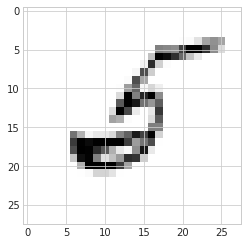

In [56]:
plt.imshow(x_train[1000,:].reshape((28,28)))

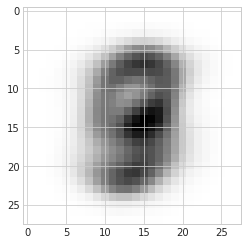

In [57]:
plt.imshow(y_self[1000,:].reshape((28,28)))

In [58]:
decoded_pred, encoded_pred = net.forward(x_train)
decoded_pred.shape, encoded_pred.shape

(torch.Size([54077, 784]), torch.Size([54077, 4]))

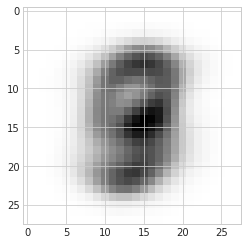

In [59]:
plt.imshow(decoded_pred[1000,:].reshape((28,28)))

### check prediction

In [60]:
y_pred = net.predict(x_test)
y_pred.shape 

(10000, 784)

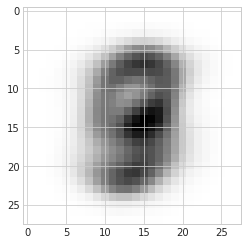

In [61]:
plt.imshow(y_pred[1,:].reshape((28,28)))

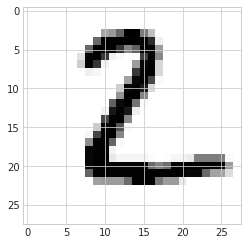

In [62]:
plt.imshow(x_test[1,:].reshape((28,28)))